# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cargamos los datos

In [66]:
df = pd.read_csv('data/df_furniture.csv')
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


## 2. Tratar la fecha como texto y parsear

In [8]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted
15,NaT,2457.704334
21,NaT,2715.938414
39,NaT,2857.008678
40,NaT,3086.648631
60,NaT,3298.628987


In [67]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 3. ¿De qué fecha a qué fecha va el histórico?

In [9]:
df['Month'].min()

Timestamp('1992-01-01 00:00:00')

In [10]:
df['Month'].max()

Timestamp('2019-07-01 00:00:00')

In [68]:
fechas = pd.date_range(df['Month'].min(), df['Month'].max(), freq="MS")
fechas

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', length=331, freq='MS')

In [14]:
len(fechas)

331

In [69]:
df["Month"] = fechas
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

In [70]:
df.index = df['Month']

# set_index()

In [25]:
df.drop(columns=['Month'], inplace=True)

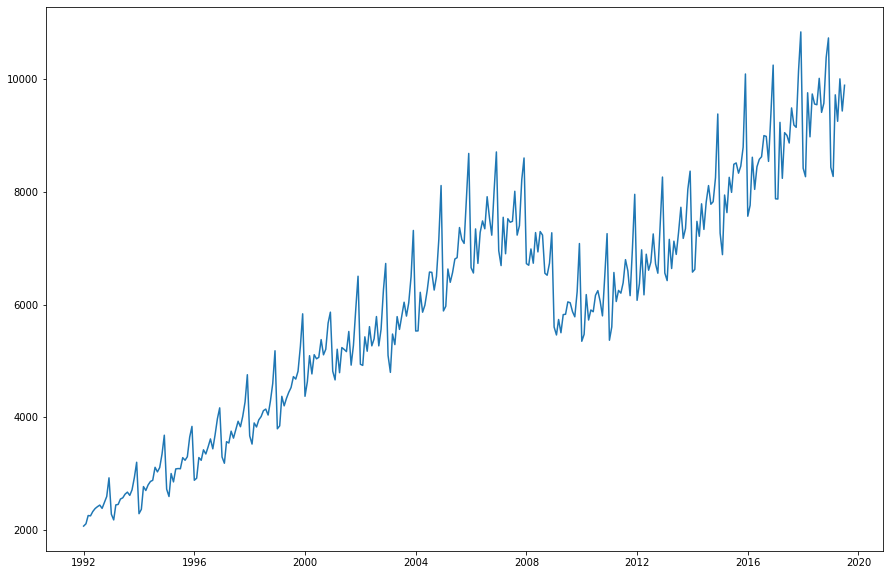

In [28]:
plt.figure(figsize=(15,10))
plt.plot(df)

Podemos observar que tiene una tendencia positiva, tiene una estacionalidad anual, cada año se está repitiendo un mismo patrón. Todo esto nos hace indicar que la serie temporal no es estacionaria.

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['furniture_price_adjusted'].values)
result[1]

0.7035529748089981

Como el nivel de significación (p-valor) es mayor a 0.05, nos quedamos con la hipótesis nula de que no es estacionaria, y rechazaremos la hipótesis alternativa de que es estacionaria.

In [32]:
int(len(df)/2)

165

In [33]:
df[:int(len(df)/2)].describe()

,furniture_price_adjusted
count,165.000000
mean,4366.695881
std,1412.738867
min,2073.432724
25%,3115.400080
50%,4275.168742
75%,5428.334524
max,8110.153770


In [34]:
df[int(len(df)/2):].describe()

,furniture_price_adjusted
count,166.000000
mean,7575.142501
std,1270.370560
min,5349.481724
25%,6613.056182
50%,7345.578004
75%,8439.580036
max,10833.501852


Comprobamos también que varían los estadísticos con el tiempo, por lo tanto podemos volver a afirmar que esta serie no es estacionaria.

## 6. ¿Conoces algún método para representar mejor la tendencia?

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df['furniture_price_adjusted'], model = 'additive', extrapolate_trend = 'freq')

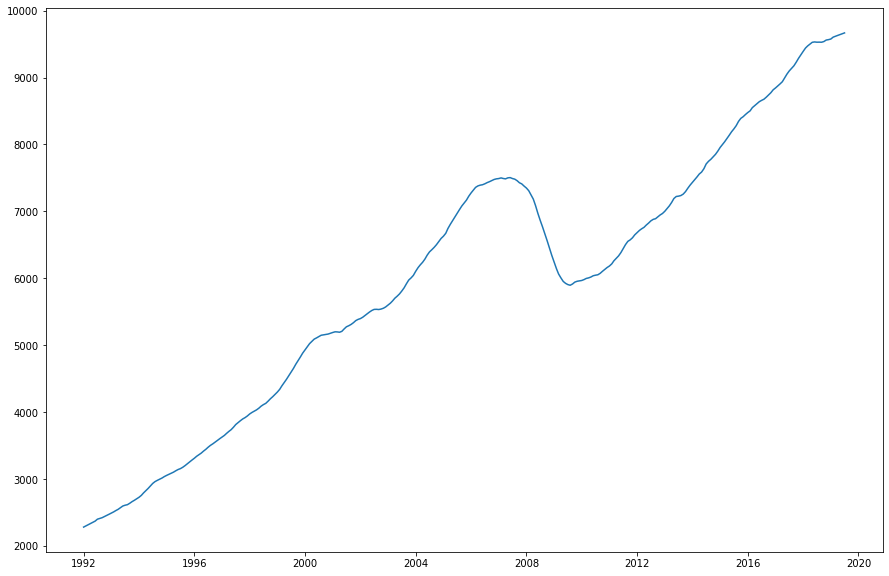

In [39]:
plt.figure(figsize=(15,10))
plt.plot(result_add.trend)

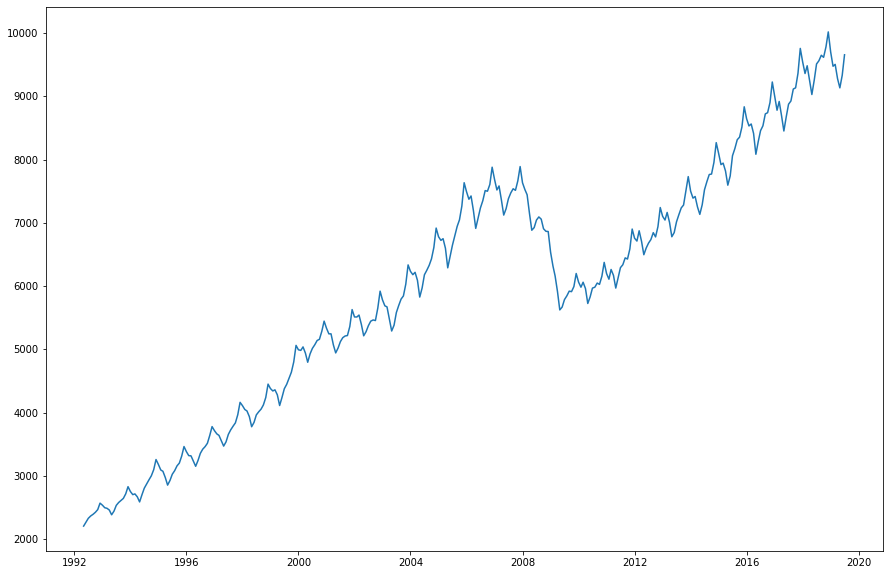

In [44]:
df_ma = df['furniture_price_adjusted'].rolling(5).mean()
plt.figure(figsize=(15,10))
plt.plot(df_ma)

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

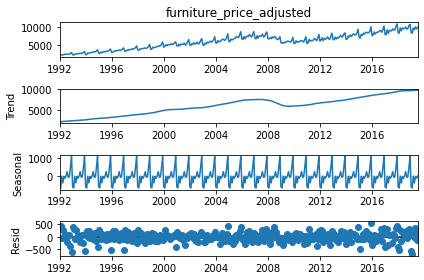

In [46]:
result_add.plot();

In [48]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['furniture_price_adjusted'], model = 'multiplicative', extrapolate_trend = 'freq')

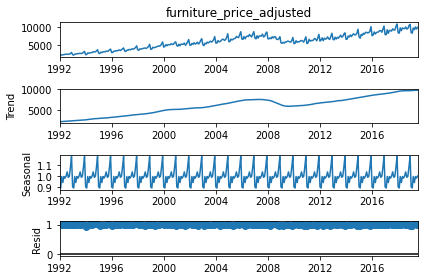

In [50]:
result_mul.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

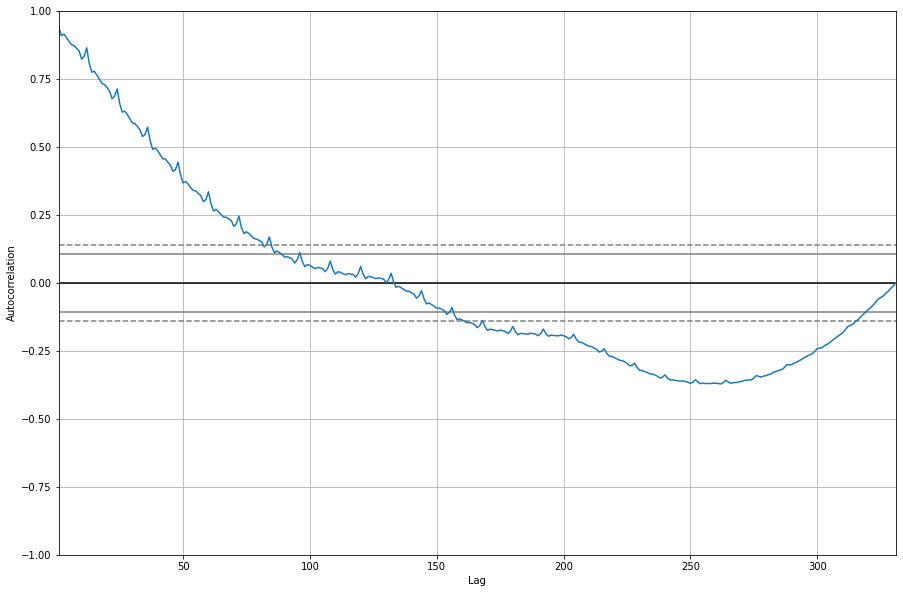

In [52]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15,10))
autocorrelation_plot(df['furniture_price_adjusted']);

Podemos observar los picos de autocorrelación, que nos indica su estacionalidad, se repite un patrón cada año, es decir, cada 12 meses.

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

In [53]:
df.corr()

,furniture_price_adjusted
furniture_price_adjusted,1.0


In [55]:
for i in range(5,0,-1):
    df['t-'+str(i)] = df['furniture_price_adjusted'].shift(i)

df.dropna(inplace=True)
df

,furniture_price_adjusted,t-5,t-4,t-3,t-2,t-1
Month,,,,,,
1992-06-01,2384.638567,2073.432724,2114.485812,2260.570891,2255.103236,2331.414618
1992-07-01,2417.165376,2114.485812,2260.570891,2255.103236,2331.414618,2384.638567
1992-08-01,2445.498729,2260.570891,2255.103236,2331.414618,2384.638567,2417.165376
1992-09-01,2387.351705,2255.103236,2331.414618,2384.638567,2417.165376,2445.498729
1992-10-01,2489.350838,2331.414618,2384.638567,2417.165376,2445.498729,2387.351705
...,...,...,...,...,...,...
2019-03-01,9718.107698,9569.037851,10380.194097,10726.595075,8431.965334,8271.237355
2019-04-01,9248.814254,10380.194097,10726.595075,8431.965334,8271.237355,9718.107698
2019-05-01,10001.305304,10726.595075,8431.965334,8271.237355,9718.107698,9248.814254


<AxesSubplot:>

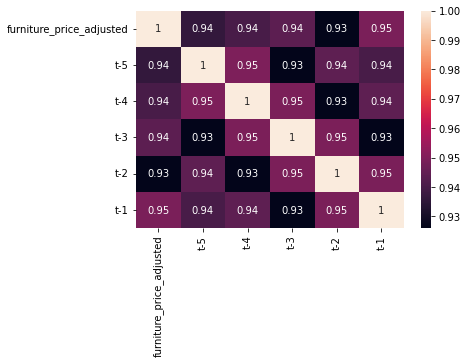

In [56]:
sns.heatmap(df.corr(), annot=True)

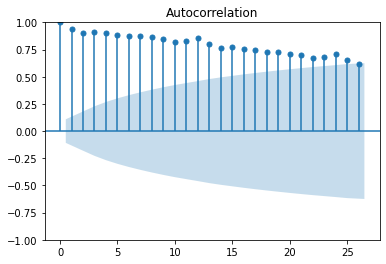

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
# plt.figure(figsize=(15,10))
plot_acf(df['furniture_price_adjusted']);

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

Hemos comprobado en apartados anteriores que es de 12 meses.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [64]:
len(result_add.trend)

331

In [71]:
len(df)

331

In [72]:
df['detrend_values'] = df['furniture_price_adjusted'] - result_add.trend
df

,Month,furniture_price_adjusted,detrend_values
Month,,,
1992-01-01,1992-01-01,2073.432724,-207.841017
1992-02-01,1992-02-01,2114.485812,-184.639705
1992-03-01,1992-03-01,2260.570891,-56.406401
1992-04-01,1992-04-01,2255.103236,-79.725832
1992-05-01,1992-05-01,2331.414618,-21.266225
...,...,...,...
2019-03-01,2019-03-01,9718.107698,101.098007
2019-04-01,2019-04-01,9248.814254,-380.821760
2019-05-01,2019-05-01,10001.305304,359.042967


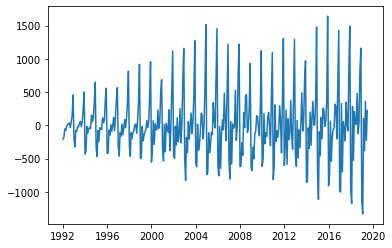

In [73]:
plt.plot(df['detrend_values'])